In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
df = pd.read_csv('Data/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,NaN,NaN,NaN,150076.0,86646.852011,0.0,75038.0,150076.0,225114.0,300152.0
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83


In [8]:
# Drop unnamed column
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<Axes: >

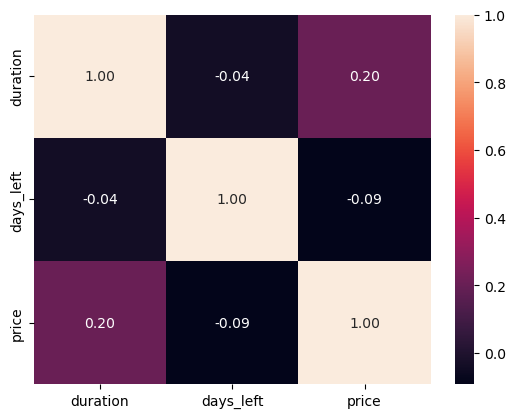

In [13]:
# EDA
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

In [41]:
# with help from chat gpt -4o
def plot_all_numerical_histograms(df, bins=30, kde=True, color='skyblue'):
    """
    Plots histograms for all numerical columns in the DataFrame as subplots.

    Parameters:
    - df: pandas DataFrame
    - bins: number of bins in histogram
    - kde: show kernel density estimation
    - color: bar color
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n = len(numeric_cols)
    
    if n == 0:
        print("No numeric columns to plot.")
        return

    cols = 3  # number of subplot columns
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 8))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col].dropna(), bins=bins, kde=kde, color=color, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()

def plot_all_categorical_bars(df, top_n=10, color='cornflowerblue'):
    """
    Plots bar charts for all categorical columns in the DataFrame as subplots.

    Parameters:
    - df: pandas DataFrame
    - top_n: number of top categories to show
    - color: bar color
    """
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    n = len(cat_cols)
    
    if n == 0:
        print("No categorical columns to plot.")
        return

    cols = 3  # number of subplot columns
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 6))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        counts = df[col].value_counts().head(top_n)
        sns.barplot(x=counts.values, y=counts.index, color=color, ax=axes[i])
        axes[i].set_title(f'Top {min(top_n, len(counts))} in {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()


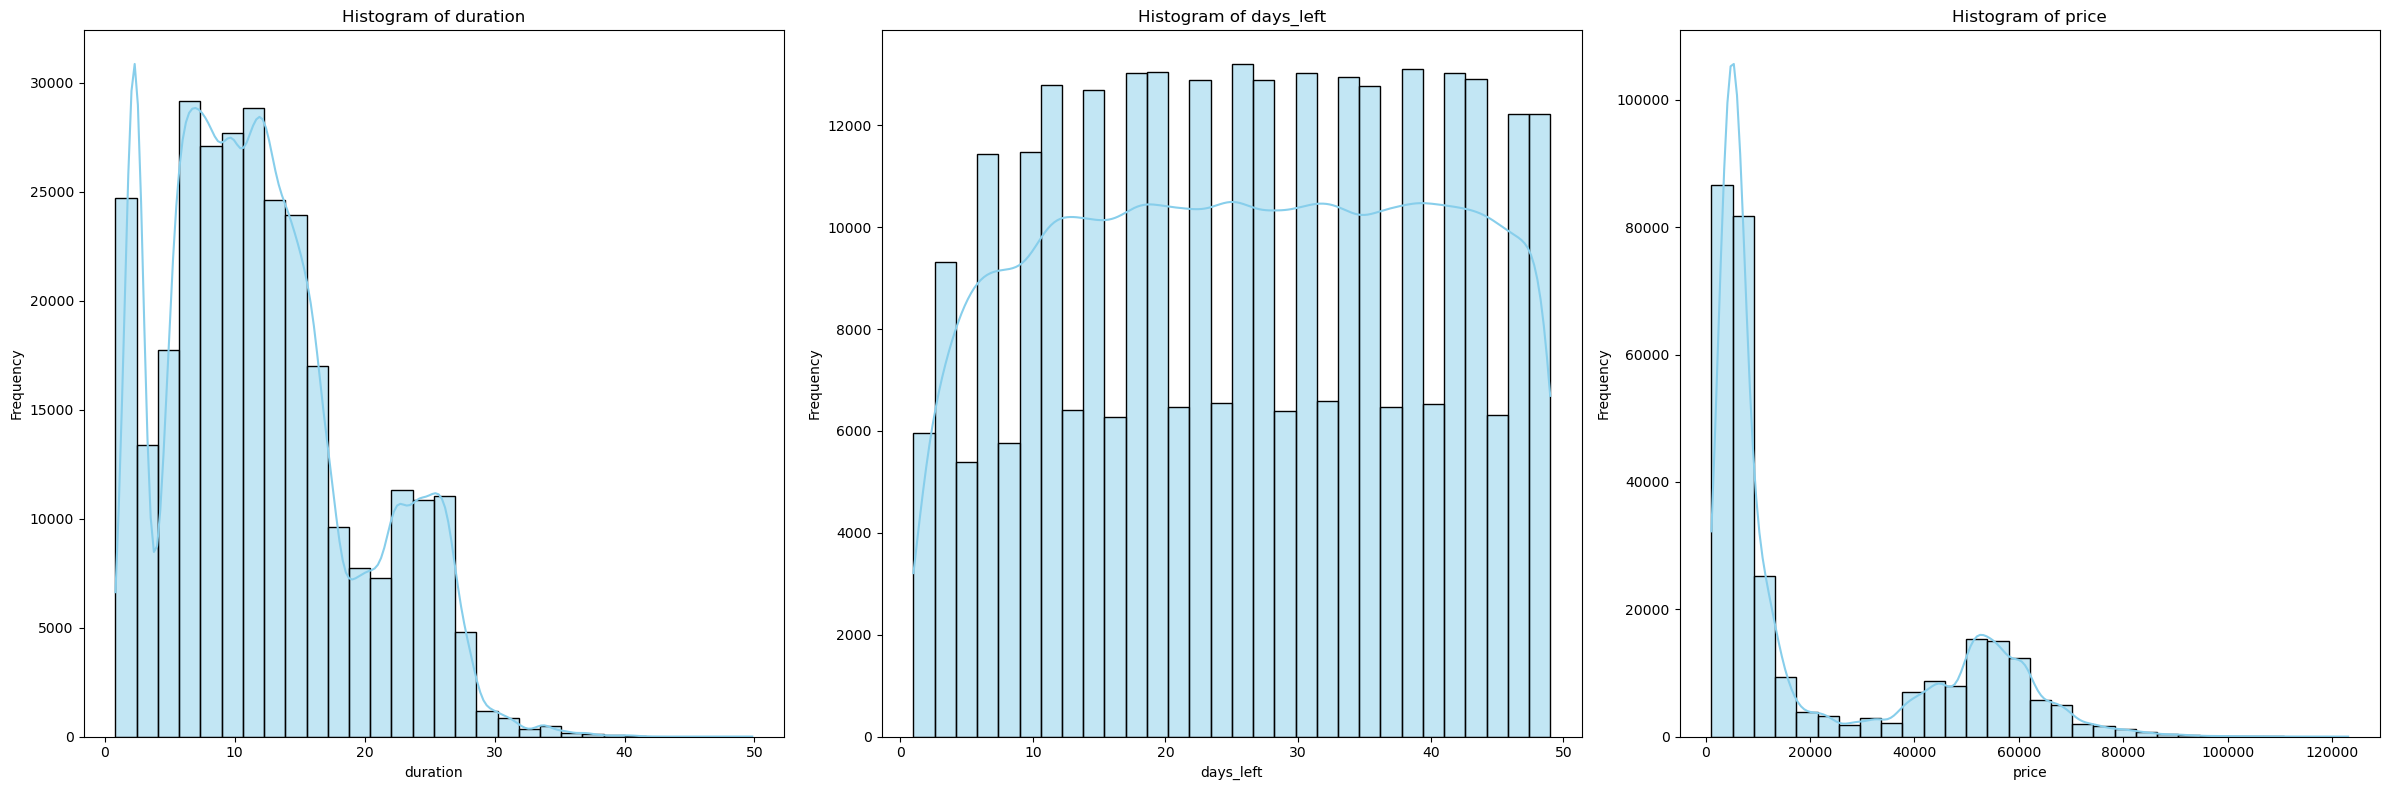

In [36]:
plot_all_numerical_histograms(df)

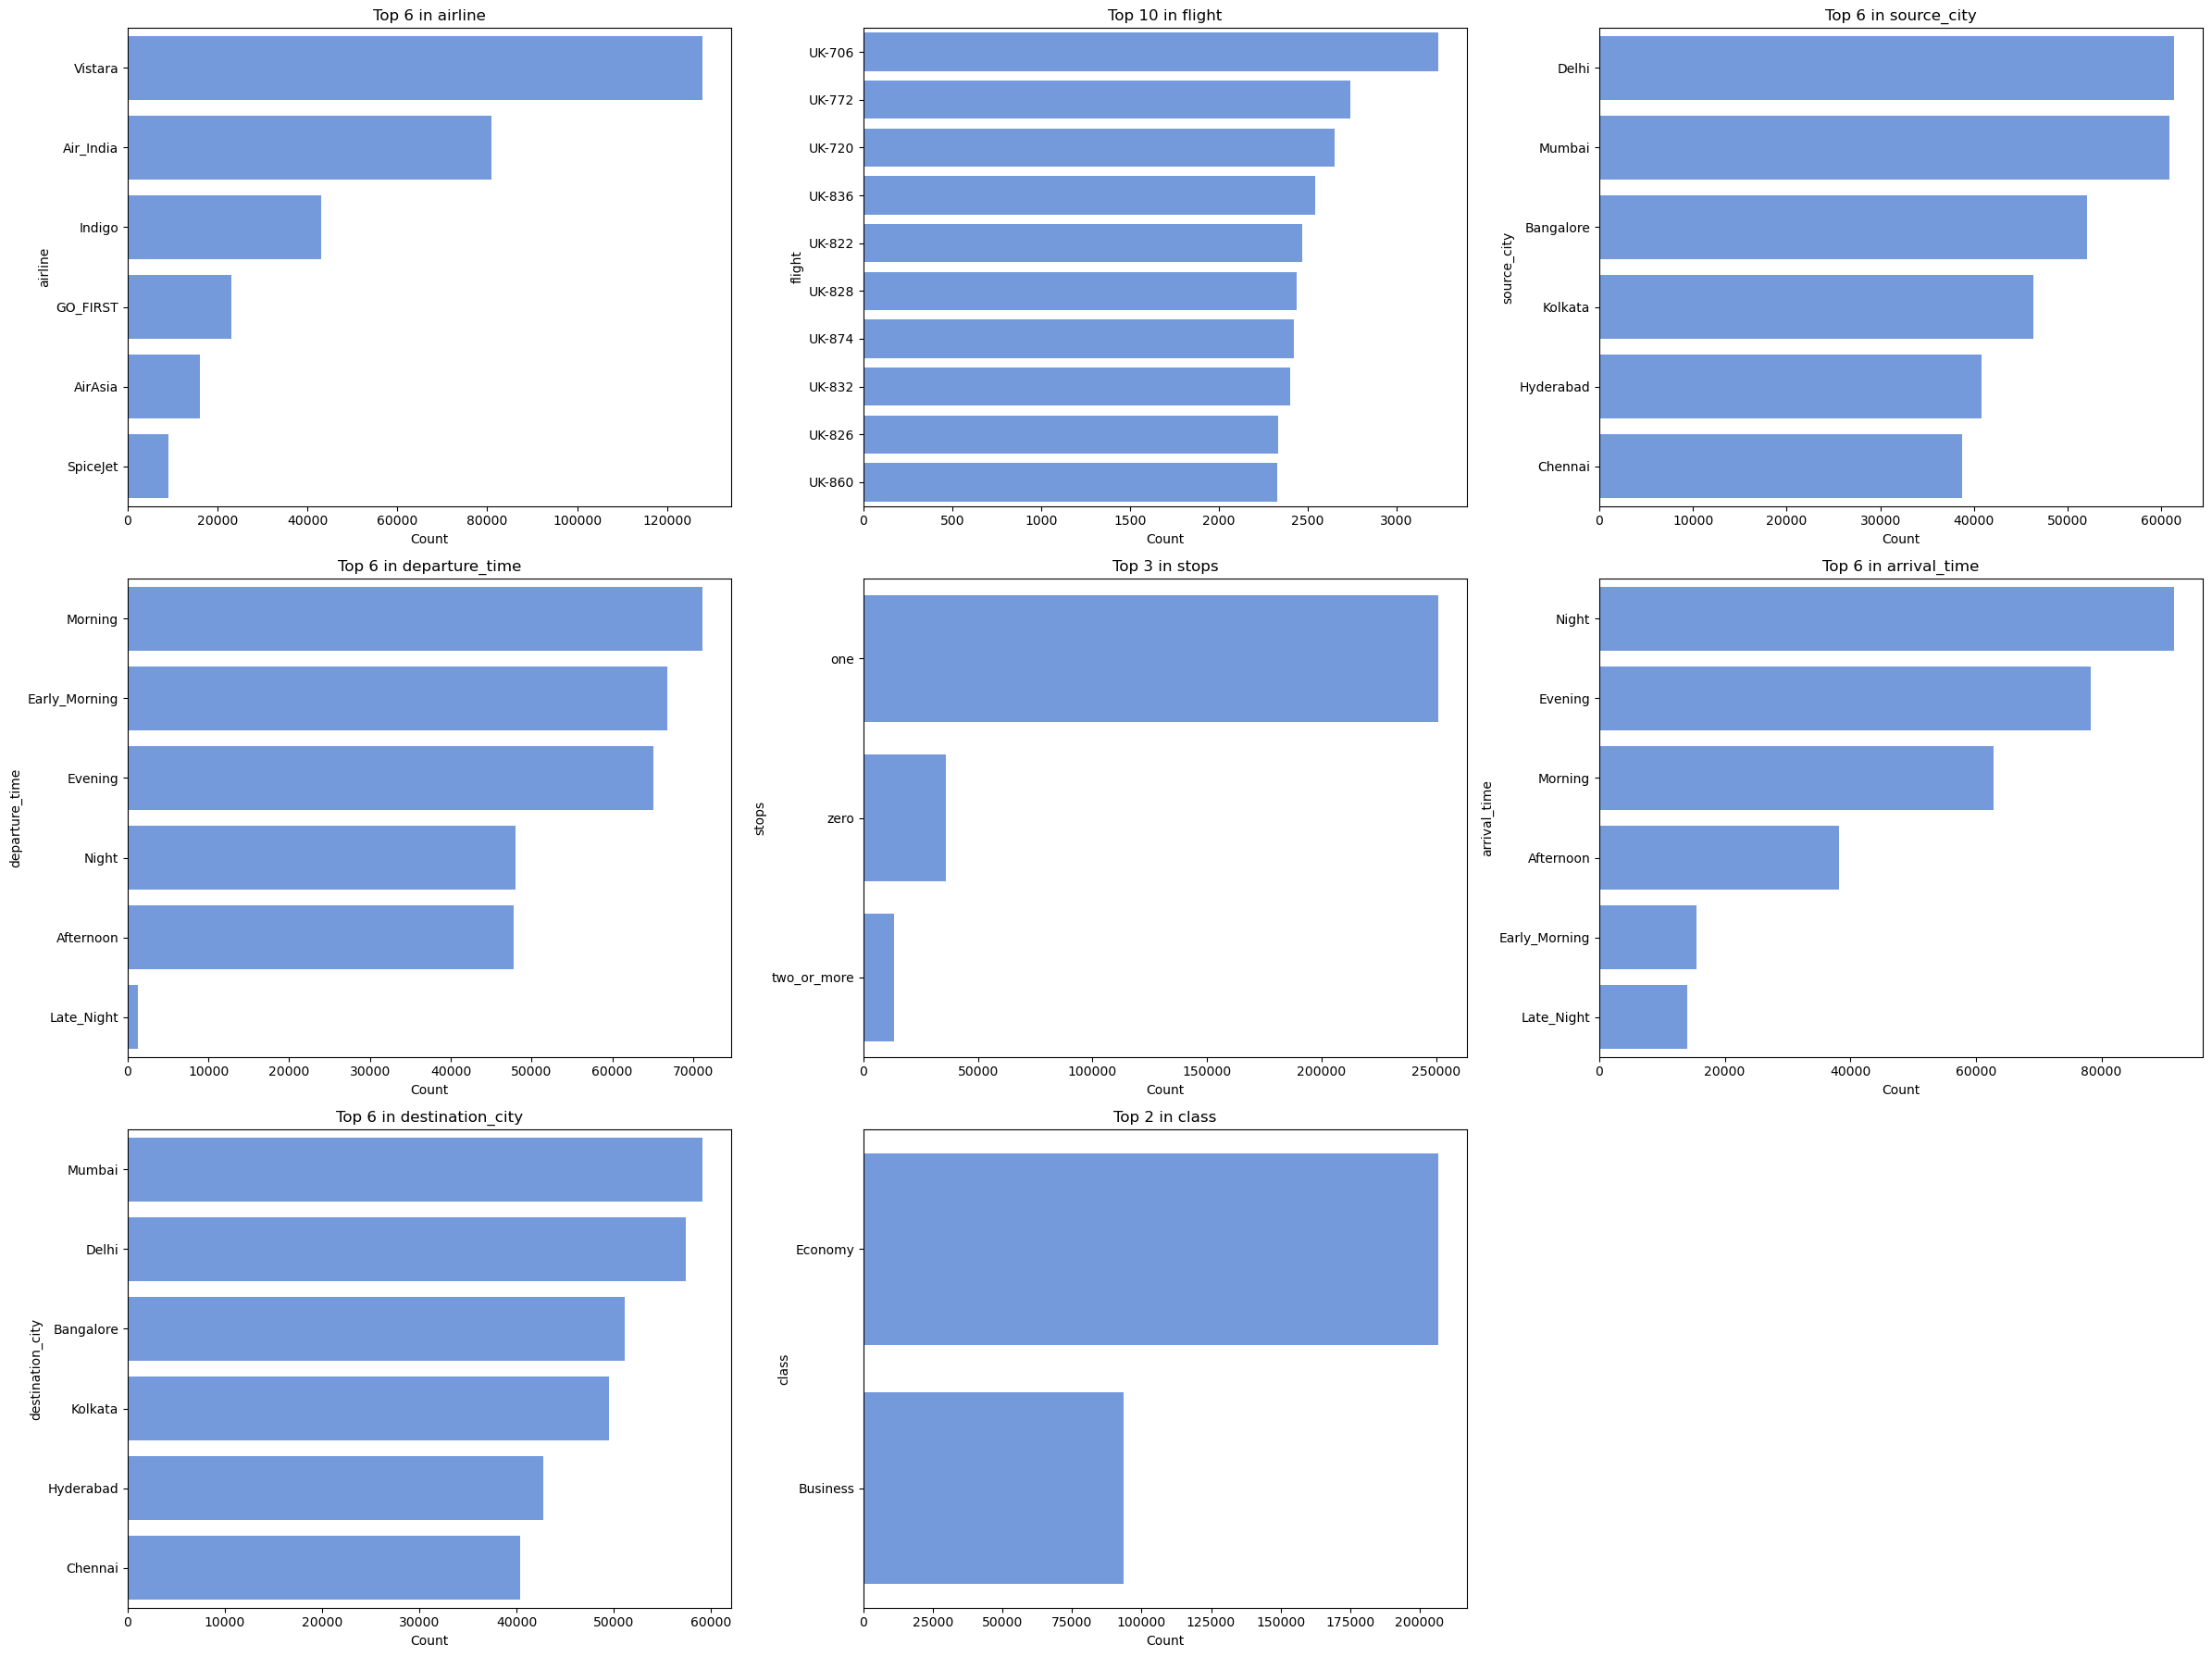

In [40]:
plot_all_categorical_bars(df)

In [42]:
def check_nulls_and_zeros(df):
    """
    Returns a summary DataFrame with counts of nulls and zero values for each column.
    - Nulls are checked for all columns.
    - Zeros are counted only for numeric columns.
    """
    summary = pd.DataFrame(index=df.columns)
    
    summary['null_count'] = df.isnull().sum()
    summary['null_pct'] = df.isnull().mean().round(3) * 100
    
    # Only apply zero check to numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    summary['zero_count'] = df[numeric_cols].eq(0).sum()
    summary['zero_count'] = summary['zero_count'].fillna(0).astype(int)

    summary['zero_pct'] = (df[numeric_cols].eq(0).mean() * 100).round(2)
    summary['zero_pct'] = summary['zero_pct'].fillna(0)

    return summary.sort_values(by=['null_count', 'zero_count'], ascending=False)

In [43]:
check_nulls_and_zeros(df)

,null_count,null_pct,zero_count,zero_pct
airline,0,0.0,0,0.0
flight,0,0.0,0,0.0
source_city,0,0.0,0,0.0
departure_time,0,0.0,0,0.0
stops,0,0.0,0,0.0
arrival_time,0,0.0,0,0.0
destination_city,0,0.0,0,0.0
class,0,0.0,0,0.0
duration,0,0.0,0,0.0
days_left,0,0.0,0,0.0
